In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
df = pd.read_csv("netflix_titles.csv")
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [8]:
# Drop rows where essential info is missing
df.dropna(subset=["country", "date_added", "rating"], inplace=True)

# Strip whitespace and convert to datetime safely
df['date_added'] = df['date_added'].str.strip()  # 🧼 removes leading/trailing spaces
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')  # 🛡 handles bad formats
df = df.dropna(subset=['date_added'])  # 🔥 drop rows where conversion failed

# Extract the year
df['year_added'] = df['date_added'].dt.year


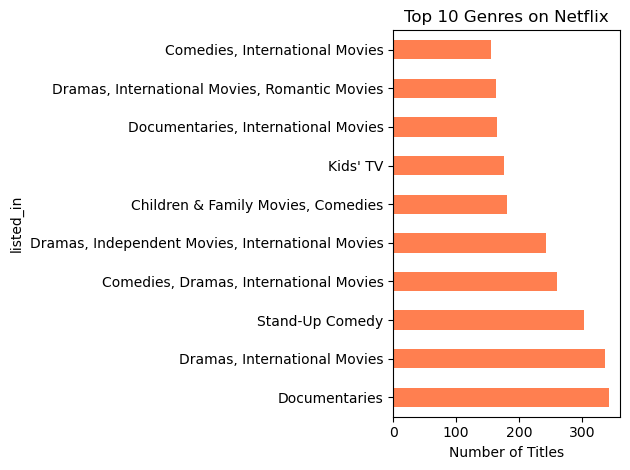

In [9]:
df['listed_in'].value_counts().head(10).plot(kind='barh', color='coral')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Number of Titles')
plt.tight_layout()
plt.savefig('top_genres.png')
plt.show()


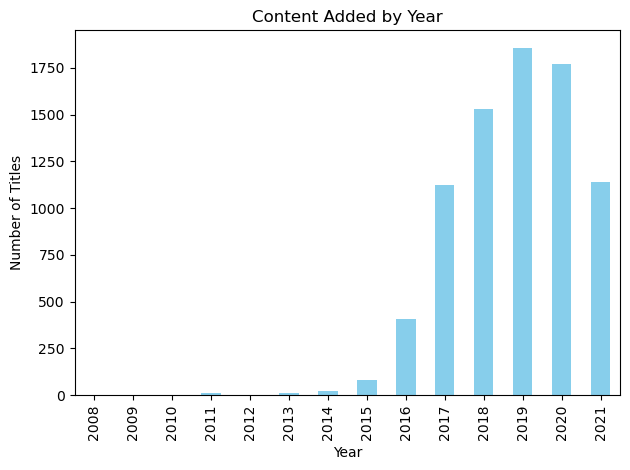

In [10]:
df['year_added'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Content Added by Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.tight_layout()
plt.savefig('yearly_addition.png')
plt.show()


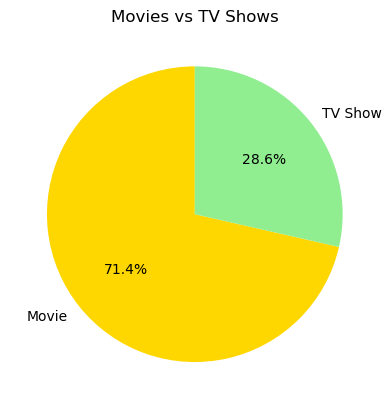

In [11]:
df['type'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['gold', 'lightgreen'])
plt.title('Movies vs TV Shows')
plt.ylabel('')
plt.savefig('type_distribution.png')
plt.show()
